<a href="https://colab.research.google.com/github/ymmoolenaar/CAP4630/blob/master/HW_2/hw2q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

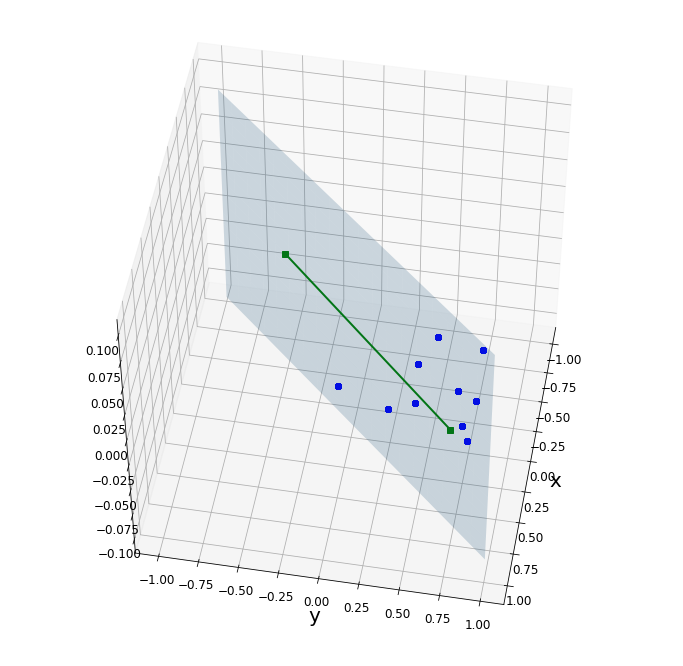

In [184]:
def f(x, y):
  return (0.01*x + 0.1*y)

x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#commented out in case I want different values
#points[0] = np.random.random(size=10)
#points[1] = np.random.random(size=10)
points = np.array([[0.50780506, 0.41927166, 0.01812404, 0.79275811, 0.06904591, 0.47425502, 0.56067829, 0.62842646, 0.68863163, 0.25327238],
                   [0.00997878, 0.72344366, 0.5356566, 0.8361177, 0.82138836, 0.84332617, 0.48509466, 0.3336284,  0.7915582,  0.45129411]])

plane = plt.figure(figsize=(12,12)).gca(projection="3d")
plane.plot_surface(x,y,Z, alpha=0.2)
plane.view_init(50,10)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)

m = 2
weight = initial_weight
weight[0] = 1
weight_path_mgd = []
batch_size = 2

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

weight_path_mgd[-1]
weight_path_mgd = np.array(weight_path_mgd[-1])
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", 
         linewidth=2, label="mini-batch")

for i in range(10):
  plt.plot(points[0], points[1], "bo")